
*   Arthur Callegari - RM565476
*   Bruno Maurus - RM562503
*   Felipe Franca - RM566393
*   Natan Mestre - RM565552
*   Murilo Pontes - RM561290


In [47]:
!pip install --upgrade openpyxl
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
df = pd.read_csv("df_t.csv")

In [7]:
#renomeando
novos_nomes = {'nk_ota_localizer_id' : 'id_compra',
               'fk_contact' : 'id_cliente',
                'date_purchase' : 'data_compra',
                'time_purchase' : 'hora_compra',
                'place_origin_departure' : 'origem_ida',
                'place_destination_departure' : 'destino_ida',
                'place_origin_return' : 'origem_volta',
                'place_destination_return' : 'destino_volta',
                'fk_departure_ota_bus_company' : 'empresa_ida' ,
                'fk_return_ota_bus_company' : 'empresa_volta' ,
                'gmv_success' : 'valor_total_ticket',
                'total_tickets_quantity_success' : 'qnt_passagens' }

In [8]:
df.rename(columns=novos_nomes, inplace=True)
df.columns

Index(['id_compra', 'id_cliente', 'data_compra', 'hora_compra', 'origem_ida',
       'destino_ida', 'origem_volta', 'destino_volta', 'empresa_ida',
       'empresa_volta', 'valor_total_ticket', 'qnt_passagens'],
      dtype='object')

In [9]:
df['data_compra'] = pd.to_datetime(df['data_compra'])


**--RFM--**

A ideia é segmentar os clientes da ClickBus em grupos bem definidos, com foco em campanhas de marketing personalizados para cada grupo.

O método escolhido foi por Recência, Frequência e Monetário.

In [10]:
df['hora_compra'] = df['hora_compra'].astype(str).str.replace('0 days ', '', regex=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741344 entries, 0 to 1741343
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id_compra           object        
 1   id_cliente          object        
 2   data_compra         datetime64[ns]
 3   hora_compra         object        
 4   origem_ida          object        
 5   destino_ida         object        
 6   origem_volta        object        
 7   destino_volta       object        
 8   empresa_ida         object        
 9   empresa_volta       object        
 10  valor_total_ticket  float64       
 11  qnt_passagens       int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 159.4+ MB


Começando calculo das métricas


In [11]:
data_de_referencia = df['data_compra'].max()

In [12]:
data_atual = data_de_referencia + dt.timedelta(days=1)

In [13]:
df['data_compra'].max() + dt.timedelta(days=1)
print(f"Data de referência para o cálculo de Recência: {data_atual.date()}")


Data de referência para o cálculo de Recência: 2024-04-02


In [14]:
df_vendas = df[df['valor_total_ticket'] > 0]
print(f"DataFrame original tinha {len(df)} linhas. O de vendas tem {len(df_vendas)} linhas.")

df_rfm = df_vendas.groupby('id_cliente').agg(
    Recencia=('data_compra', lambda date: (data_atual - date.max()).days),
    Frequencia=('id_compra', 'nunique'),
    Monetario=('valor_total_ticket', 'sum')
)



DataFrame original tinha 1741344 linhas. O de vendas tem 1741159 linhas.


In [15]:
df_rfm.head()


,Recencia,Frequencia,Monetario
id_cliente,,,
0000029b76ad3cf9d86ad430754fb1d4478069affda61e8adaf4c57e9aa4b37b,1179,1,91.02
000010ae2e13049769982d9f07de792d92452ff1d124e3a49109fa57f6af54b8,698,2,162.00
00001f68902d3e8d332baa62a69065ce71e7b5a8c850a505a429f5ae0c0bd6d7,1979,1,169.90
00007a5d618cd250d7f05766cfe01a8663a3767f1cd669eebe57f83f03b51e3e,485,4,688.48
00008c39885815e42a0bb750cee199cd4da741a564570530cc38c3dc040f030c,914,2,118.87


In [16]:
df_rfm = df_rfm.reset_index()

In [17]:
print("\nDataFrame com as métricas RFM:")
df_rfm.head(10)


DataFrame com as métricas RFM:


,id_cliente,Recencia,Frequencia,Monetario
0,0000029b76ad3cf9d86ad430754fb1d4478069affda61e...,1179,1,91.02
1,000010ae2e13049769982d9f07de792d92452ff1d124e3...,698,2,162.00
2,00001f68902d3e8d332baa62a69065ce71e7b5a8c850a5...,1979,1,169.90
3,00007a5d618cd250d7f05766cfe01a8663a3767f1cd669...,485,4,688.48
4,00008c39885815e42a0bb750cee199cd4da741a5645705...,914,2,118.87
5,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,86,4,679.06
6,0000c9586834a554214416abb8014182a8c69b90160e13...,933,1,216.41
7,0000d57595eea2c9fe1506820592427b38b3ec80a46166...,1287,4,823.71
8,0000dea5e6639594dfcae72f08908decdf6e6577f4edd4...,2743,1,147.40
9,0000f8d3780a2ac76a901f5f2078ba04cf730606282da0...,98,1,245.05


In [18]:
print("\nEstatísticas descritivas das métricas RFM:")
df_rfm.describe()



Estatísticas descritivas das métricas RFM:


,Recencia,Frequencia,Monetario
count,581751.000000,581751.000000,581751.000000
mean,1035.148314,2.992963,482.203218
std,877.466878,7.630504,1618.184215
min,1.000000,1.000000,2.710000
25%,323.000000,1.000000,115.550000
50%,805.000000,1.000000,233.640000
75%,1590.000000,3.000000,499.325000
max,3843.000000,1275.000000,454229.010000


A análise permite ver:
-Apenas um quarto dos clientes na base de dados comprou no último ano.
-Possui muitos clientes ocasionais e poucos compradores recorrentes.
-A maioria gasta pouco.

In [19]:
# Recência: valores menores (mais recentes) recebem score maior
df_rfm['R_score'] = pd.qcut(df_rfm['Recencia'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Frequência: valores maiores recebem score maior
df_rfm['F_score'] = pd.qcut(df_rfm['Frequencia'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Valor Monetário: valores maiores recebem score maior
df_rfm['M_score'] = pd.qcut(df_rfm['Monetario'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Criar a coluna RFM_Score
df_rfm['RFM_Score'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)

print("Primeiras linhas do df_rfm com os scores:")
df_rfm.head()

Primeiras linhas do df_rfm com os scores:


,id_cliente,Recencia,Frequencia,Monetario,R_score,F_score,M_score,RFM_Score
0,0000029b76ad3cf9d86ad430754fb1d4478069affda61e...,1179,1,91.02,2,1,1,211
1,000010ae2e13049769982d9f07de792d92452ff1d124e3...,698,2,162.00,3,3,2,332
2,00001f68902d3e8d332baa62a69065ce71e7b5a8c850a5...,1979,1,169.90,1,1,2,112
3,00007a5d618cd250d7f05766cfe01a8663a3767f1cd669...,485,4,688.48,4,5,5,455
4,00008c39885815e42a0bb750cee199cd4da741a5645705...,914,2,118.87,3,3,2,332


In [20]:
def rfm_segment(score_str):

    r_score = int(score_str[0])
    f_score = int(score_str[1])
    m_score = int(score_str[2])

#definindo os grupos
    if r_score >= 4 and f_score >= 4 and m_score >= 4:
        return 'Melhores Clientes'
    elif r_score >= 3 and f_score >= 4 and m_score >= 4:
        return 'Clientes Fiéis'
    elif r_score >= 4 and f_score <= 2 and m_score >= 4:
        return 'Promissores'
    elif r_score >= 4 and f_score == 1:
        return 'Novos Clientes'
    elif r_score <= 2 and f_score >= 3 and m_score >= 3:
        return 'Em Risco'
    elif r_score <= 2 and f_score <= 2:
        return 'Adormecidos'
    elif r_score <= 1 and f_score <= 1 and m_score <= 1:
        return 'Clientes Perdidos'
    elif r_score >= 3 and f_score >= 1 and m_score >= 1:
        return 'Potenciais'
    else:
        return 'Outros'

df_rfm['Segmento'] = df_rfm['RFM_Score'].apply(rfm_segment)

print("Primeiras linhas do df_rfm com a nova coluna Segmento:")
print(df_rfm[['RFM_Score', 'Segmento']].head())

segmento_analise = df_rfm.groupby('Segmento').agg({
    'Recencia': 'mean',
    'Frequencia': 'mean',
    'Monetario': ['mean', 'count']
}).round(2)
print("\nAnálise descritiva dos segmentos RFM:")
segmento_analise


Primeiras linhas do df_rfm com a nova coluna Segmento:
  RFM_Score           Segmento
0       211        Adormecidos
1       332         Potenciais
2       112        Adormecidos
3       455  Melhores Clientes
4       332         Potenciais

Análise descritiva dos segmentos RFM:


Recencia Frequencia Monetario        
                      mean       mean      mean   count
Segmento                                               
Adormecidos        1995.57       1.00    176.31  118064
Clientes Fiéis      787.18       5.38    922.59   27979
Em Risco           1847.09       3.43    577.97   74745
Melhores Clientes   224.61       8.36   1365.52  100343
Novos Clientes      272.16       1.00    129.37   25634
Outros             1941.74       1.43    104.02   39818
Potenciais          527.60       1.55    213.65  182037
Promissores         276.83       1.00    557.70   13131

In [21]:
#analisando cada segmento
segmento_counts = df_rfm['Segmento'].value_counts().sort_index()
segmento_counts

,count
Segmento,
Adormecidos,118064
Clientes Fiéis,27979
Em Risco,74745
Melhores Clientes,100343
Novos Clientes,25634
Outros,39818
Potenciais,182037
Promissores,13131


**Descrição dos Segmentos RFM**

Melhores Clientes: A elite. Compram com muita frequência, gastam bastante e compraram há pouco tempo. São os clientes mais valiosos e engajados.

Clientes Fiéis: A base sólida. Compram com frequência e gastaram bem, mas podem não ter comprado tão recentemente quanto os "Melhores Clentes". São leais e importantes.

Promissores: Potencial. Fizeram poucas compras, mas gastaram muito e compraram recentemente. Se voltarem a comprar, podem se tornar "Melhores Clentes".

Novos Clientes: Acabaram de chegar. Fizeram sua primeira compra há pouco tempo. O objetivo é incentivá-los a fazer uma segunda compra.

Potenciais: Clientes que compraram recentemente, mas não compram com frequência. Podem ser incentivados a comprar mais vezes para se tornarem fiéis.

Em Risco: Clientes valiosos que estão sumindo. Costumavam comprar e gastar bastante, mas não aparecem há um bom tempo. Precisam de atenção imediata para não serem perdidos.

Adormecidos: Clientes de baixo valor que não compram há um tempo. Compraram pouco, gastaram pouco e a última compra já faz tempo.

Clientes Perdidos: Clientes de baixo valor que não compram há muito, muito tempo. A chance de reativá-los é mínima.

Outros: Um grupo geral para clientes que não se encaixam claramente nas categorias principais.

In [22]:
segmento_analise = df_rfm.groupby('Segmento').agg({
    'Recencia': 'mean',
    'Frequencia': 'mean',
    'Monetario': ['mean', 'count']
}).round(2)
segmento_analise

Recencia Frequencia Monetario        
                      mean       mean      mean   count
Segmento                                               
Adormecidos        1995.57       1.00    176.31  118064
Clientes Fiéis      787.18       5.38    922.59   27979
Em Risco           1847.09       3.43    577.97   74745
Melhores Clientes   224.61       8.36   1365.52  100343
Novos Clientes      272.16       1.00    129.37   25634
Outros             1941.74       1.43    104.02   39818
Potenciais          527.60       1.55    213.65  182037
Promissores         276.83       1.00    557.70   13131

/tmp/ipython-input-1909968465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segmento', data=df_rfm, order=segmento_counts.index, palette='viridis')


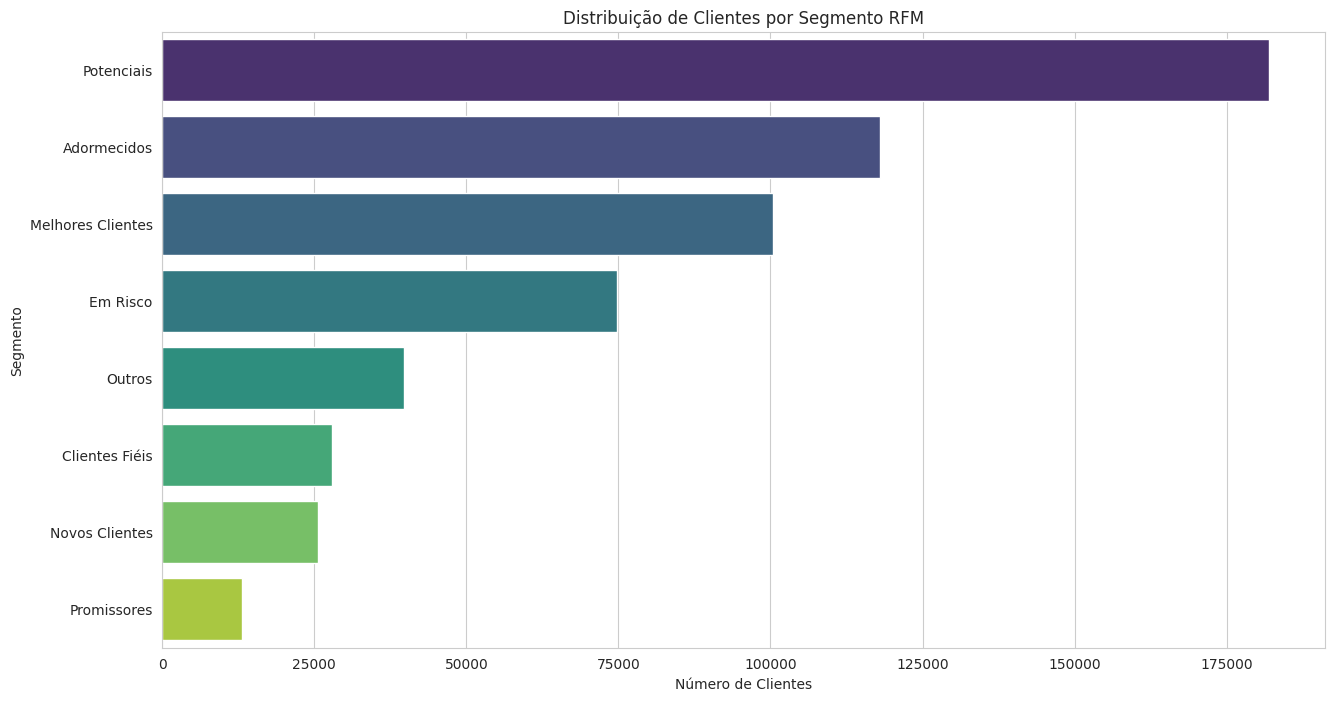

In [23]:
plt.figure(figsize=(15, 8))
segmento_counts = df_rfm['Segmento'].value_counts()
sns.countplot(y='Segmento', data=df_rfm, order=segmento_counts.index, palette='viridis')
plt.title('Distribuição de Clientes por Segmento RFM')
plt.xlabel('Número de Clientes')
plt.ylabel('Segmento')
plt.show()

A maioria dos clientes são "Potenciais". O grande desafio é fazer com que eles comprem mais e se tornem fiéis.

A soma dos "Adormecidos" e "Em Risco" é enorme, mostrando que muitos clientes estão se desengajando e podem abandonar a plataforma.

A base de "Melhores Clientes" é grande e sólida, sendo o principal pilar de faturamento da empresa.

In [24]:
# Mostrar os 5 maiores valores da coluna
df['valor_total_ticket'].nlargest(5)


,valor_total_ticket
892175,6723.93
763282,6635.55
1375736,5848.03
838332,5299.05
873618,5203.21


In [25]:
df.columns


Index(['id_compra', 'id_cliente', 'data_compra', 'hora_compra', 'origem_ida',
       'destino_ida', 'origem_volta', 'destino_volta', 'empresa_ida',
       'empresa_volta', 'valor_total_ticket', 'qnt_passagens'],
      dtype='object')

In [26]:
dfseg = pd.read_csv('rfm_segmentado.csv')

In [27]:
dfseg.columns


Index(['Unnamed: 0', 'id_cliente', 'Recencia', 'Frequencia', 'Monetario',
       'R_score', 'F_score', 'M_score', 'RFM_Score', 'Segmento'],
      dtype='object')

In [28]:
dfseg['Monetario'].nlargest(10)

,Monetario
508403,454229.01
79258,331148.28
9570,295430.03
4968,280698.56
156713,277321.75
464893,239453.90
304850,227623.16
390963,155928.48
183723,146834.07
536845,145428.82


In [29]:
df[df['id_cliente'] == "0000bf6425504de2af23d6f16b5f378a5f96de4614b930645dd830af78e0b74c"]



,id_compra,id_cliente,data_compra,hora_compra,origem_ida,destino_ida,origem_volta,destino_volta,empresa_ida,empresa_volta,valor_total_ticket,qnt_passagens
712541,cf45792038627803881f6a92985e40260ca48ee259590f...,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,2021-12-26,19:22:20,093434a3ee9e0a010bb2c2aae06c2614dd24894062a1ca...,7688b6ef52555962d008fff894223582c484517cea7da4...,0,0,d6d824abba4afde81129c71dea75b8100e96338da5f416...,1,113.35,1
1104596,f12a6a5cfe041d59691e064b3ae895a70ade60689eb71b...,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,2021-06-01,13:50:24,dbb1ded63bc70732626c5dfe6c7f50ced3d560e970f30b...,7688b6ef52555962d008fff894223582c484517cea7da4...,0,0,d6d824abba4afde81129c71dea75b8100e96338da5f416...,1,223.58,2
1275816,abe5142414c0bddbc2ddbdc93c70dccaa3d86957c3427a...,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,2024-01-07,00:27:42,7688b6ef52555962d008fff894223582c484517cea7da4...,093434a3ee9e0a010bb2c2aae06c2614dd24894062a1ca...,0,0,d6d824abba4afde81129c71dea75b8100e96338da5f416...,1,74.22,1
1283540,9b04c40523daf5f8eac337d17657cf3248b138ce36d1bd...,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,2021-12-26,17:03:40,7688b6ef52555962d008fff894223582c484517cea7da4...,aea92132c4cbeb263e6ac2bf6c183b5d81737f179f21ef...,0,0,2397346b45823e070f6fc72ac94c0a999d234c472479f0...,1,267.91,1


In [30]:
dfseg[dfseg['id_cliente'] == "0000bf6425504de2af23d6f16b5f378a5f96de4614b930645dd830af78e0b74c"]

,Unnamed: 0,id_cliente,Recencia,Frequencia,Monetario,R_score,F_score,M_score,RFM_Score,Segmento
5,5,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,86,4,679.06,5,5,5,555,Melhores Clientes


In [31]:
dfseg["Monetario"] = pd.to_numeric(dfseg["Monetario"], errors="coerce")

In [32]:
dfseg["Monetario"] = dfseg["Monetario"].astype(float)

In [33]:
dfseg.head(10)

,Unnamed: 0,id_cliente,Recencia,Frequencia,Monetario,R_score,F_score,M_score,RFM_Score,Segmento
0,0,0000029b76ad3cf9d86ad430754fb1d4478069affda61e...,1179,1,91.02,2,1,1,211,Adormecidos
1,1,000010ae2e13049769982d9f07de792d92452ff1d124e3...,698,2,162.00,3,3,2,332,Potenciais
2,2,00001f68902d3e8d332baa62a69065ce71e7b5a8c850a5...,1979,1,169.90,1,1,2,112,Adormecidos
3,3,00007a5d618cd250d7f05766cfe01a8663a3767f1cd669...,485,4,688.48,4,5,5,455,Melhores Clientes
4,4,00008c39885815e42a0bb750cee199cd4da741a5645705...,914,2,118.87,3,3,2,332,Potenciais
5,5,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,86,4,679.06,5,5,5,555,Melhores Clientes
6,6,0000c9586834a554214416abb8014182a8c69b90160e13...,933,1,216.41,3,1,3,313,Potenciais
7,7,0000d57595eea2c9fe1506820592427b38b3ec80a46166...,1287,4,823.71,2,5,5,255,Em Risco
8,8,0000dea5e6639594dfcae72f08908decdf6e6577f4edd4...,2743,1,147.40,1,1,2,112,Adormecidos
9,9,0000f8d3780a2ac76a901f5f2078ba04cf730606282da0...,98,1,245.05,5,1,3,513,Novos Clientes


In [39]:
df.head()

,id_compra,id_cliente,data_compra,hora_compra,origem_ida,destino_ida,origem_volta,destino_volta,empresa_ida,empresa_volta,valor_total_ticket,qnt_passagens
0,bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674e...,a7218ff4ee7d37d48d2b4391b955627cb089870b934912...,2018-12-26,15:33:35,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4...,0,0,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,1,89.09,1
1,5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e...,37228485e0dc83d84d1bcd1bef3dc632301bf6cb22c8b5...,2018-12-05,15:07:57,10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd...,e6d41d208672a4e50b86d959f4a6254975e6fb9b088116...,0,0,36ebe205bcdfc499a25e6923f4450fa8d48196ceb4fa0c...,1,155.97,1
2,fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8e...,3467ec081e2421e72c96e7203b929d21927fd00b6b5f28...,2018-12-21,18:41:54,7688b6ef52555962d008fff894223582c484517cea7da4...,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,0,0,ec2e990b934dde55cb87300629cedfc21b15cd28bbcf77...,1,121.99,1
3,4dc44a6dd592b702feccb493d192210c86965aee684529...,ab3251a2be0f69713b8f97b0e9d1579e31551f4fd4facf...,2018-12-06,14:01:38,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392...,0,0,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,1,55.22,1
4,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1


In [34]:
dfseg["Monetario"] = pd.to_numeric(dfseg["Monetario"], errors="coerce").round(2)

In [41]:
colunas_a_copiar = [
    'data_compra',
    'hora_compra',
    'origem_ida',
    'destino_ida',
    'origem_volta',
    'destino_volta'
]

In [43]:
dfseg[colunas_a_copiar] = df[colunas_a_copiar]

In [35]:
dfseg.to_excel("rfm.xlsx", index=False, engine='openpyxl')

In [49]:
dfseg.head(10)

,Unnamed: 0,id_cliente,Recencia,Frequencia,Monetario,R_score,F_score,M_score,RFM_Score,Segmento,data_compra,hora_compra,origem_ida,destino_ida,origem_volta,destino_volta
0,0,0000029b76ad3cf9d86ad430754fb1d4478069affda61e...,1179,1,91.02,2,1,1,211,Adormecidos,2018-12-26,15:33:35,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4...,0,0
1,1,000010ae2e13049769982d9f07de792d92452ff1d124e3...,698,2,162.00,3,3,2,332,Potenciais,2018-12-05,15:07:57,10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd...,e6d41d208672a4e50b86d959f4a6254975e6fb9b088116...,0,0
2,2,00001f68902d3e8d332baa62a69065ce71e7b5a8c850a5...,1979,1,169.90,1,1,2,112,Adormecidos,2018-12-21,18:41:54,7688b6ef52555962d008fff894223582c484517cea7da4...,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,0,0
3,3,00007a5d618cd250d7f05766cfe01a8663a3767f1cd669...,485,4,688.48,4,5,5,455,Melhores Clientes,2018-12-06,14:01:38,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392...,0,0
4,4,00008c39885815e42a0bb750cee199cd4da741a5645705...,914,2,118.87,3,3,2,332,Potenciais,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0
5,5,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,86,4,679.06,5,5,5,555,Melhores Clientes,2021-02-11,22:25:15,d26eae87829adde551bf4b852f9da6b8c3c2db9b65b8b6...,482d9673cfee5de391f97fde4d1c84f9f8d6f2cf0784fc...,0,0
6,6,0000c9586834a554214416abb8014182a8c69b90160e13...,933,1,216.41,3,1,3,313,Potenciais,2021-02-19,19:11:40,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,be47addbcb8f60566a3d7fd5a36f8195798e2848b36819...,0,0
7,7,0000d57595eea2c9fe1506820592427b38b3ec80a46166...,1287,4,823.71,2,5,5,255,Em Risco,2020-12-03,09:16:29,7688b6ef52555962d008fff894223582c484517cea7da4...,a3af7b3808c4cf72478d05c9bab9c0d47e31c1d2cb3a29...,0,0
8,8,0000dea5e6639594dfcae72f08908decdf6e6577f4edd4...,2743,1,147.40,1,1,2,112,Adormecidos,2020-12-04,08:28:26,6b51d431df5d7f141cbececcf79edf3dd861c3b4069f0b...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,0,0
9,9,0000f8d3780a2ac76a901f5f2078ba04cf730606282da0...,98,1,245.05,5,1,3,513,Novos Clientes,2021-07-02,11:41:19,90b5bc7f03c840b2efddb22ffdfc37dd12cb391b49aa0f...,f6103ca1e01bd200a9258a366b7e8c22a542e771bf11a0...,0,0


In [50]:
dfseg['data_compra'] = pd.to_datetime(dfseg['data_compra'])

In [51]:
dfseg['ano'] = dfseg['data_compra'].dt.year

In [52]:
top_4_anos = dfseg['ano'].value_counts().head(4)

In [53]:
print("Os 4 anos com mais datas de compras foram:")
print(top_4_anos)

Os 4 anos com mais datas de compras foram:
ano
2022    123973
2023    122850
2021     88698
2019     60962
Name: count, dtype: int64


In [45]:
dfseg.to_excel("arquivoFinal.xlsx", index=False, engine='openpyxl')

KeyboardInterrupt: 

In [48]:
dfseg.to_csv('seu_arquivo_corrigido.csv', index=False, sep=';', decimal=',')